# What are Top Skills for Diffrent Roles ?

## Goals

What are top skills for following:
1. Data Analyst
2. Data Engineer
3. Data Scientist
4. Software Engineer

Methodolgy
1. Clean skill column
2. Calculate skill count base on job_title_short
3. Calculate skill percentage
4. Visualize

### Loading and Cleaning

In [1]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns

# loading data set
df = pd.read_csv("C:\\Users\\Dell\\Documents\\VSCODE\\Python\\Data Analysis\\Data\\data_jobs.csv")

# data cleaning
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x : literal_eval(x) if pd.notna(x) else x)

### Calculating skill count and percentage

In [2]:
df_filtered = df[df["job_country"] == "United States"]

In [65]:
#skill count and job count
df_exploded = df_filtered[["job_title_short", "job_skills"]].explode("job_skills")
df_skill_count = df_exploded.groupby(["job_title_short", "job_skills"]).agg("size").to_frame()
df_skill_count = df_skill_count.rename(columns = {0 : "counts"})
df_skill_count["counts"] = df_skill_count["counts"].apply(lambda x :  x * 1.0)
df_job_counts = df_filtered.groupby("job_title_short").agg("size")

In [ ]:
# creating seperate data frame for percent
df_skill_percent = df_skill_count.copy()
df_skill_percent = df_skill_percent.rename(columns = {"counts" : "percent"})

# converting to percentage that skill will be in jobb listing
for title in df_job_counts.index :
    df_skill_percent.loc[title, "percent"] = df_skill_count.loc[title, "counts"].apply(lambda x : (x / df_job_counts[title]) * 100).values

# sorting both count and percent
df_skill_percent = df_skill_percent.sort_values(by = "percent", ascending = False).reset_index()
df_skill_count = df_skill_count.sort_values(by = "counts", ascending = False).reset_index()

### Visualizing

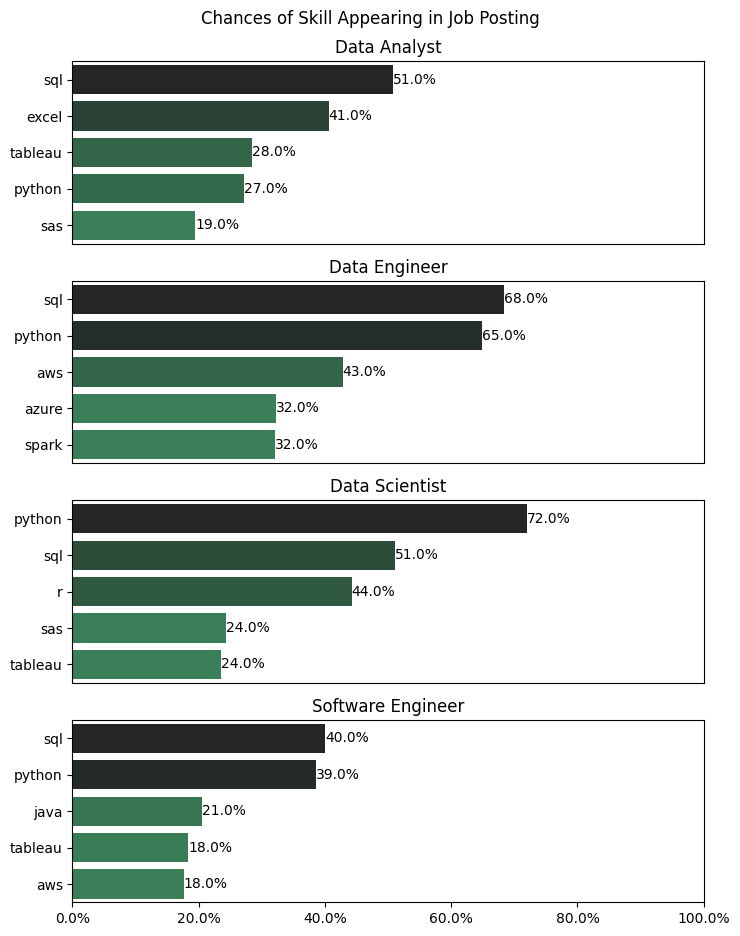

In [82]:
investigate_roles = ["Data Analyst", "Data Engineer", "Data Scientist", "Software Engineer"]
fig, ax = plt.subplots(len(investigate_roles), 1)

for i,role in enumerate(investigate_roles) :
    sns.barplot(
        data = df_skill_percent[df_skill_percent["job_title_short"] == role].head(),
        x = "percent",
        y = "job_skills",
        orient = "h",
        hue = "percent",
        palette = "dark:seagreen_r",
        legend = False,
        ax = ax[i]
    )
    ax[i].set_title(role)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_xlim(0, 100)

    if i < len(investigate_roles)  - 1 :
        ax[i].set_xticks([])

    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda value, pos : f"{value}%"))
    
    for number, value in enumerate(df_skill_percent[df_skill_percent["job_title_short"] == role].head()["percent"]) :
        ax[i].text(value, number, f"{round(value, 0)}%", va = "center")

fig.set_size_inches(7.5, 9.5)
fig.suptitle("Chances of Skill Appearing in Job Posting")
plt.tight_layout()
plt.show()

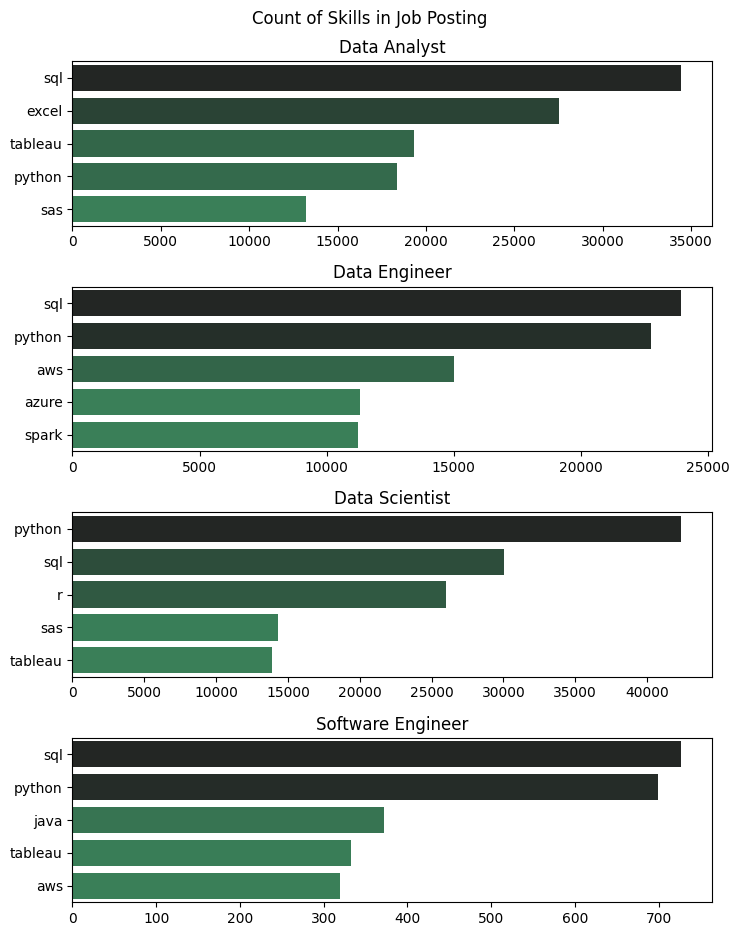

In [77]:
investigate_roles = ["Data Analyst", "Data Engineer", "Data Scientist", "Software Engineer"]
fig, ax = plt.subplots(len(investigate_roles), 1)

for i,role in enumerate(investigate_roles) :
    sns.barplot(
        data = df_skill_count[df_skill_count["job_title_short"] == role].head(),
        x = "counts",
        y = "job_skills",
        orient = "h",
        hue = "counts",
        palette = "dark:seagreen_r",
        legend = False,
        ax = ax[i]
    )
    ax[i].set_title(role)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda value, pos : f"{int(value)}"))

fig.set_size_inches(7.5, 9.5)
fig.suptitle("Count of Skills in Job Posting")
plt.tight_layout()
plt.show()